### ENTRENAR MODELO DE REGRESIÓN LOGÍSTICA MULTINOMINAL
A partir del CSV de 'nutrition.csv':
- Características: valor nutricional y peso
- Etiquetas: Sano, medio y no sano.

In [2]:
# Cargamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as plt

#### Carga y limpieza de datos

In [ ]:
# Cargamos el CSV con las columnas que nos interesan
df = pd.read_csv("nutrition.csv", usecols=["weight", "calories"])

# Analizamos el contenido del DataFrame
# print(df.info())
# print(df.describe())

# Eliminamos las filas donde el peso es diferente de 100
df = df.where(df["weight"] == 100)
df = df.dropna()
# Eliminamos la variable de peso la cual ya no necesitamos
df = df.drop(columns=["weight"])

# Creamos la columna de categoria_nutricional
# Etiquetas: Sano, medio y no sano
# Sano: bajo en calorías (0-150 kcal)
# Medio: medio en calorías (150-400 kcal)
# No sano: alto en calorías (400+ kcal)
condiciones = [
    df['calories'] <= 150,
    (df['calories'] > 150) & (df['calories'] <= 300),
    df['calories'] > 300
]
valores = ["Sano", "Medio", "No sano"]
df['categoria'] = np.select(condiciones, valores, default="Desconocido")

print(df.head())

    calories categoria
1      300.0     Medio
12     330.0   No sano
15     200.0     Medio
20     250.0     Medio
25      80.0      Sano


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        Sano       1.00      1.00      1.00         9
       Medio       1.00      1.00      1.00         5
     No sano       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



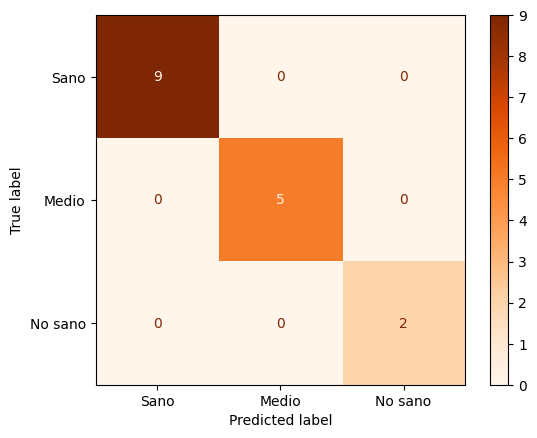

In [33]:
# Definimos las variables predictoras y la variable objetivo
X = df.drop(columns=["categoria"])
y = df["categoria"]

# Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo de regresión logística multinominal
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500) # El parámetro " multi_class='mulnominal' " es el que determina que este modelo de RL sea multinominal

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de la clasificación
print(classification_report(y_test, y_pred, target_names=["Sano", "Medio", "No sano"]))

# Creamos la matriz de confusión y la mostramos
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Sano", "Medio", "No sano"], cmap= plt.colormaps.get_cmap("Oranges"))